In [1]:
 import pandas as pd 
import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.cluster import KMeans
 from sklearn.preprocessing import StandardScaler
 from sklearn.decomposition import PCA
 from sklearn.metrics import silhouette_score
 import warnings
 warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

file_path = r"C:\Users\admin\Downloads\gitehub\data.csv"

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head())
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'")
    print("Please double-check the path and filename. Make sure the file exists and the name is spelled correctly.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully!
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

#  Data Preprocessing

In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
df = data.drop(['id', 'Unnamed: 32'], axis=1)

In [7]:
 df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0}) # Malignant:1, Benign:0

#  Discriptive Statistics

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [10]:
#dropped the  Diagnosis (target) since clustering is unsupervised.
df.drop(columns=["diagnosis"], inplace=True)  # Removing Target

In [11]:
 # Standardize the data
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(df)

In [13]:
#  Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

In [16]:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance[:2]) # Summing only the first 2 as implied by the print statements

print(f"Variance explained by PC1: {explained_variance[0]:.4f}")
print(f"Variance explained by PC2: {explained_variance[1]:.4f}")
# Corrected line: added .4f for formatting and the closing brace '}'
print(f"Total variance explained by first 2 components: {total_explained_variance:.4f}")

Variance explained by PC1: 0.4427
Variance explained by PC2: 0.1897
Total variance explained by first 2 components: 0.6324


In [18]:
 #Use the Elbow Method to determine the optimal number of clusters
 wcss = []  # Within-Cluster Sum of Squares
 K_range = range(1, 11)
 for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_) 

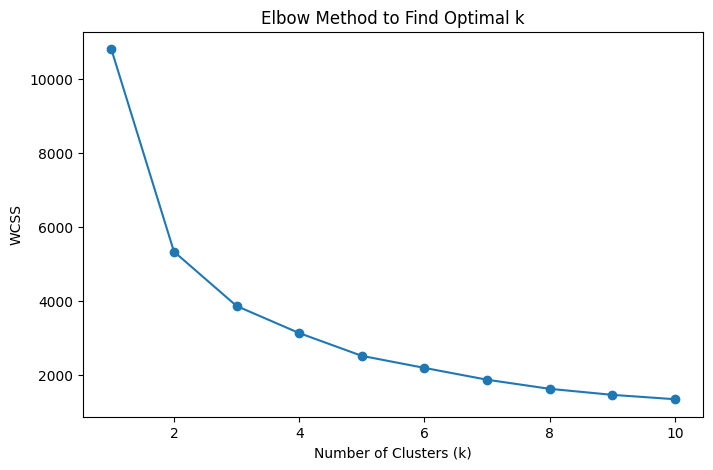

In [22]:
 # Plot the Elbow Method Graph
 plt.figure(figsize=(8, 5))
 plt.plot(K_range, wcss, marker="o", linestyle="-")
 plt.xlabel("Number of Clusters (k)")
 plt.ylabel("WCSS")
 plt.title("Elbow Method to Find Optimal k")
 plt.show()

# Applying K-Means Clustering

In [23]:
 optimal_k = 2
 kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
 clusters = kmeans.fit_predict(X_pca)

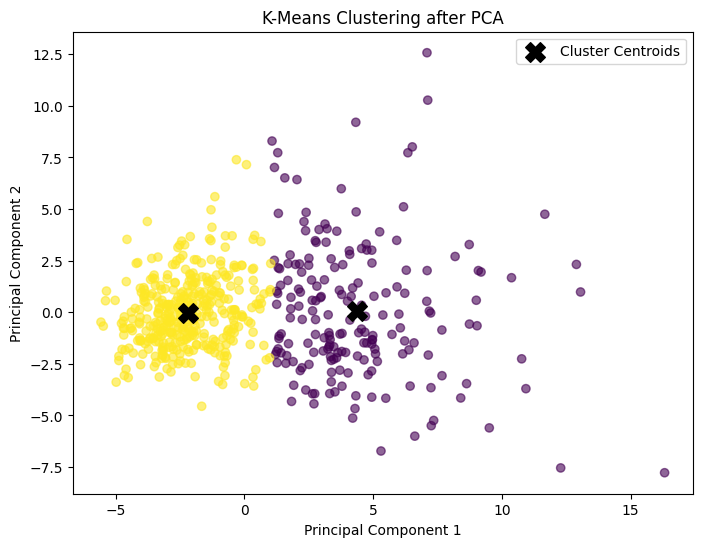

In [25]:
# Step 7: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)

# Corrected line:
# - Added the color for the centroids (e.g., 'red', or 'black', or an array of colors)
# - Added the closing parenthesis for the plt.scatter() function
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Cluster Centroids') # Using 'black' for centroids and 'X' marker

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering after PCA")
plt.legend() # This will now display the legend for 'Cluster Centroids'
plt.show()

 The Elbow Method should show a bend at k=2, confirming that two clusters are optimal.
 The final scatter plot should show two distinct clusters corresponding to malignant and
 benign tumors